In [22]:
# Bibliotecas gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão de dados e pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Modelos de aprendizado de máquina
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Métricas de avaliação
from sklearn.metrics import accuracy_score, classification_report

# Visualização adicional para árvores de decisão
import graphviz


In [23]:
df = pd.read_csv("../data/breast-cancer-wisconsin-data_data.csv")

#  Variáveis em português
colunas_traduzidas = {
    "id": "id",
    "diagnosis": "diagnóstico",
    "radius_mean": "raio_médio",
    "texture_mean": "textura_média",
    "perimeter_mean": "perímetro_médio",
    "area_mean": "área_média",
    "smoothness_mean": "suavidade_média",
    "compactness_mean": "compactação_média",
    "concavity_mean": "concavidade_média",
    "concave points_mean": "pontos_concavos_médios",
    "symmetry_mean": "simetria_média",
    "fractal_dimension_mean": "dimensão_fractal_média",
    "radius_se": "raio_se",
    "texture_se": "textura_se",
    "perimeter_se": "perímetro_se",
    "area_se": "área_se",
    "smoothness_se": "suavidade_se",
    "compactness_se": "compactação_se",
    "concavity_se": "concavidade_se",
    "concave points_se": "pontos_concavos_se",
    "symmetry_se": "simetria_se",
    "fractal_dimension_se": "dimensão_fractal_se",
    "radius_worst": "raio_pior",
    "texture_worst": "textura_pior",
    "perimeter_worst": "perímetro_pior",
    "area_worst": "área_pior",
    "smoothness_worst": "suavidade_pior",
    "compactness_worst": "compactação_pior",
    "concavity_worst": "concavidade_pior",
    "concave points_worst": "pontos_concavos_piores",
    "symmetry_worst": "simetria_pior",
    "fractal_dimension_worst": "dimensão_fractal_pior"
}

df = df.rename(columns=colunas_traduzidas)

In [24]:
# Remover colunas desnecessárias e lidar com valores nulos
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Converter a coluna 'diagnóstico' para numérico (M = 1, B = 0)
df['diagnóstico'] = df['diagnóstico'].map({'M': 1, 'B': 0})


In [25]:
# Matriz de correlação
correlation_matrix = df.corr() # matriz onde as células representam correlação entre duas variáveis

# 1 proporcional, -1 inversamente proporcional, 0 não há correlação

correlation_with_target = correlation_matrix['diagnóstico'].abs().sort_values(ascending=False)
print("Correlação com o diagnóstico:")
print(correlation_with_target)

# faz a compração diagnostico com os outros e ordena as variáveis correlatas

top_features = correlation_with_target.index[1:11]  


Correlação com o diagnóstico:
diagnóstico               1.000000
pontos_concavos_piores    0.793566
perímetro_pior            0.782914
pontos_concavos_médios    0.776614
raio_pior                 0.776454
perímetro_médio           0.742636
área_pior                 0.733825
raio_médio                0.730029
área_média                0.708984
concavidade_média         0.696360
concavidade_pior          0.659610
compactação_média         0.596534
compactação_pior          0.590998
raio_se                   0.567134
perímetro_se              0.556141
área_se                   0.548236
textura_pior              0.456903
suavidade_pior            0.421465
simetria_pior             0.416294
textura_média             0.415185
pontos_concavos_se        0.408042
suavidade_média           0.358560
simetria_média            0.330499
dimensão_fractal_pior     0.323872
compactação_se            0.292999
concavidade_se            0.253730
dimensão_fractal_se       0.077972
suavidade_se             

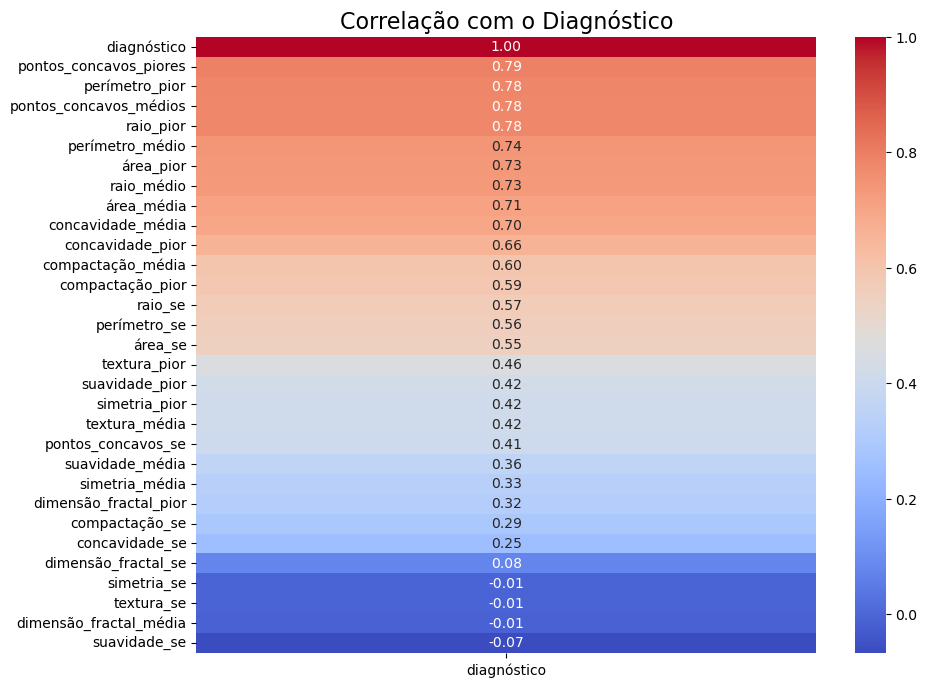

In [26]:
# Mapa de Calor da Matriz de Correlação

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix[['diagnóstico']].sort_values(by='diagnóstico', ascending=False),
            annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title('Correlação com o Diagnóstico', fontsize=16)

plt.show()

Acurácia: 0.94


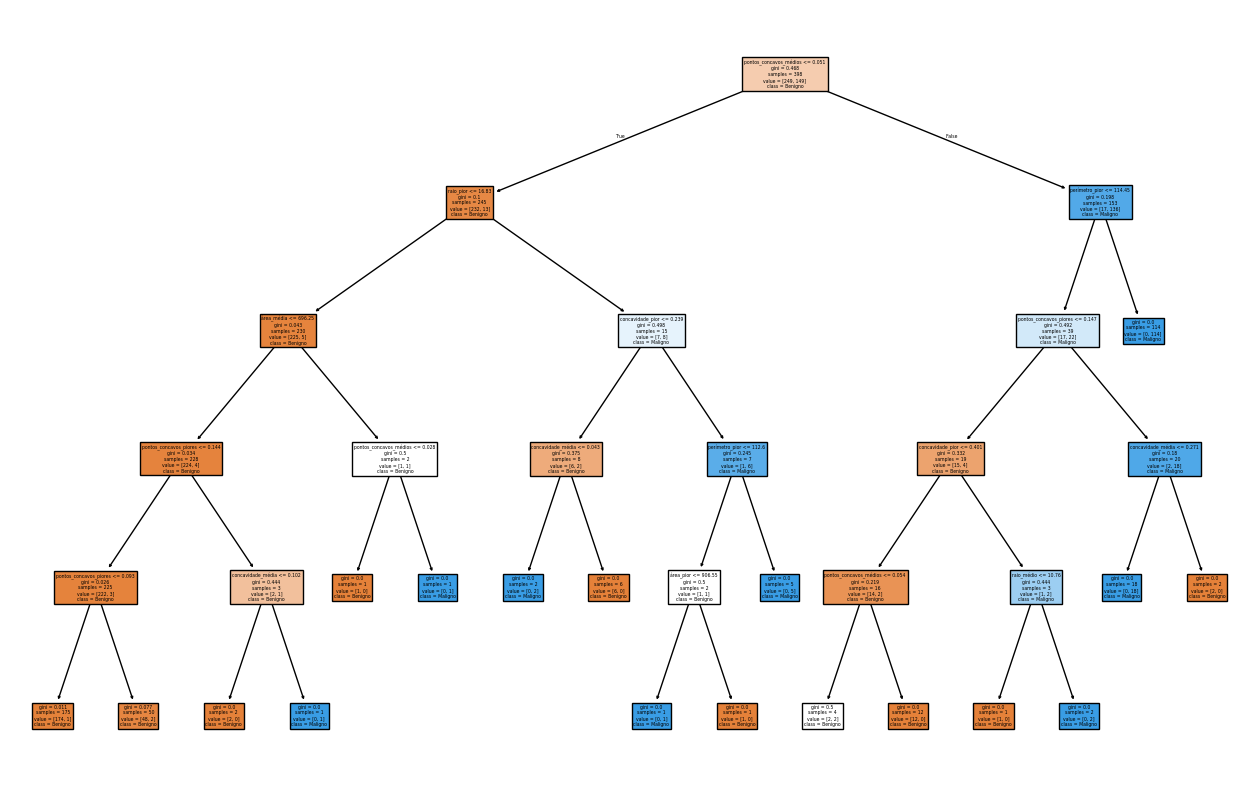

In [27]:
X = df[top_features]
y = df['diagnóstico']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar a árvore de decisão
clf = DecisionTreeClassifier(random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# O modelo já aprendeu padrões nos dados de treino (X_train e y_train).
# Agora, ele recebe novos dados (os 30% que não viu antes) e tenta prever se o tumor é maligno (1) ou benigno (0).
# O resultado é salvo em y_pred, que contém todas as previsões do modelo.

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=top_features, class_names=['Benigno', 'Maligno'], filled=True)
plt.show()

# divide os dados em 70% para treino e 30% para teste.

In [28]:
# Gerar arquivo .pdf da árvore de decisão

print("\nVisualização Interativa da Árvore de Decisão:")
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=top_features.tolist(),
                           class_names=['Benigno', 'Maligno'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("arvore_decisao", view=True)  


Visualização Interativa da Árvore de Decisão:


'arvore_decisao.pdf'

Opening in existing browser session.


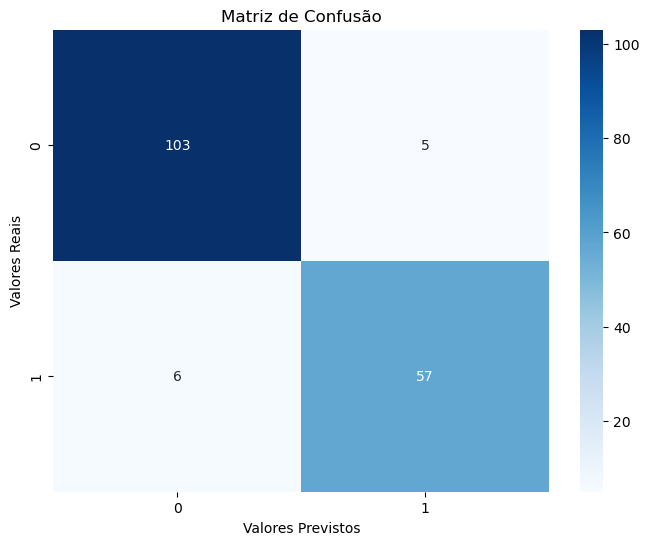


Total de Acertos: 160
Total de Erros: 11

Acurácia: 0.94


In [29]:
# A matriz de confusão mostra quantos tumores foram classificados corretamente e incorretamente.

# 1) Previsões no conjunto de teste
y_pred = clf.predict(X_test)

# 2) Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_confusao,
    annot=True,           
    fmt='d',             
    cmap='Blues',            
    xticklabels=set(y_test),  
    yticklabels=set(y_test)   
)
plt.title("Matriz de Confusão")
plt.xlabel("Valores Previstos")
plt.ylabel("Valores Reais")
plt.show()

# 3) Quantidade de acertos e erros
acertos = sum(y_test.values == y_pred)  
erros = len(y_test) - acertos           
print(f"\nTotal de Acertos: {acertos}")
print(f"Total de Erros: {erros}")

# 5) Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.2f}")

# VP FP 
# FN VN

# VP (Verdadeiro Positivo): Casos benignos corretamente classificados.
# VN (Verdadeiro Negativo): Casos malignos corretamente classificados.
# FP (Falso Positivo): Tumores benignos previstos como malignos (erro).
# FN (Falso Negativo): Tumores malignos previstos como benignos (erro mais grave).


In [30]:
# Tratar respostas inválidas
def obter_resposta(pergunta):
    while True:
        resposta = input(pergunta).strip().lower()
        if resposta in ['sim', 'não']:
            return 1 if resposta == 'sim' else 0
        else:
            print("\nResposta inválida. Por favor, digite 'sim' ou 'não'.\n")


In [31]:
def diagnosticar_arvore_decisao(modelo, feature_names):
    
    no_atual = 0

    while True:
        # Obter a característica usada para divisão neste nó
        nome_feature = feature_names[modelo.tree_.feature[no_atual]]
        limiar = modelo.tree_.threshold[no_atual]

        if modelo.tree_.feature[no_atual] == -2:  # Nó folha não tem divisão
            classe = modelo.classes_[modelo.tree_.value[no_atual].argmax()]
            if classe == 1:
                return "Maligno", "Consulte um especialista."
            else:
                return "Benigno", "Monitore regularmente."

        resposta = obter_resposta(f"A característica '{nome_feature}' é maior que {limiar:.2f}? (sim/não): ")

        if resposta == 1:  # Sim
            no_atual = modelo.tree_.children_right[no_atual]
        else:  # Não
            no_atual = modelo.tree_.children_left[no_atual]

diagnostico = diagnosticar_arvore_decisao(clf, top_features)
print(f"\nDiagnóstico: {diagnostico}")



Diagnóstico: ('Maligno', 'Consulte um especialista.')


In [32]:
# KNN

def executar_knn(df, k=5, test_size=0.3, random_state=42):

    X = df.drop(columns=['diagnóstico'])
    y = df['diagnóstico'] # alvo

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    acuracia = accuracy_score(y_test, y_pred)

    relatorio = classification_report(y_test, y_pred, target_names=["0", "1"])

    return {"acuracia": acuracia, "relatorio": relatorio}

resultado = executar_knn(df)
print(f"Acurácia do modelo KNN: {resultado['acuracia']:.2f}\n")
print("Relatório de classificação:")
print(resultado['relatorio'])


Acurácia do modelo KNN: 0.96

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



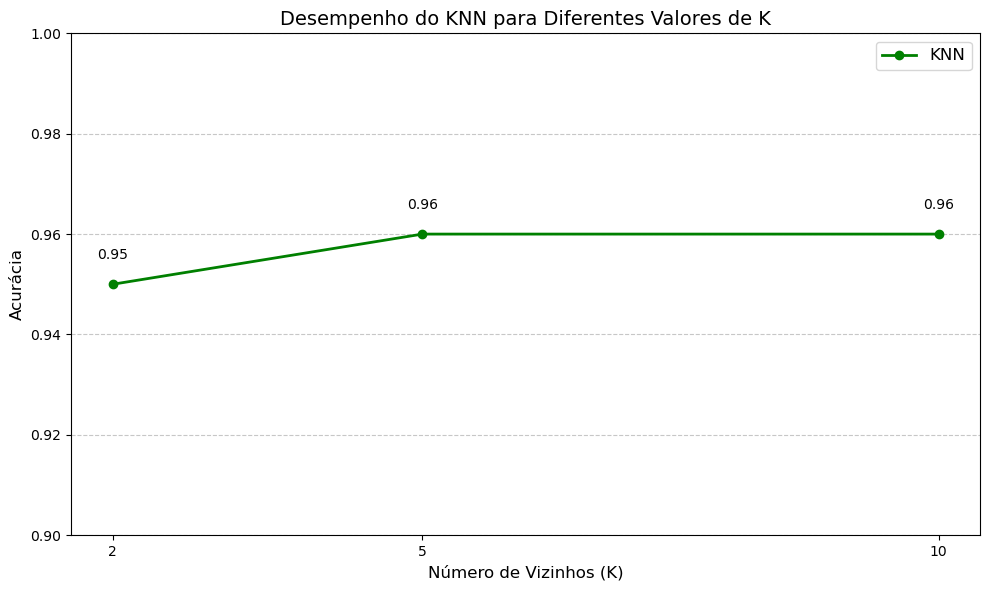

In [33]:
import matplotlib.pyplot as plt

k_values = [2, 5, 10]
accuracies = [0.95, 0.96, 0.96]

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='green', linestyle='-', linewidth=2, label='KNN')

plt.title('Desempenho do KNN para Diferentes Valores de K', fontsize=14)
plt.xlabel('Número de Vizinhos (K)', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.ylim(0.9, 1) 
plt.xticks(k_values) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

for k, acc in zip(k_values, accuracies):
    plt.text(k, acc + 0.005, f'{acc:.2f}', color='black', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


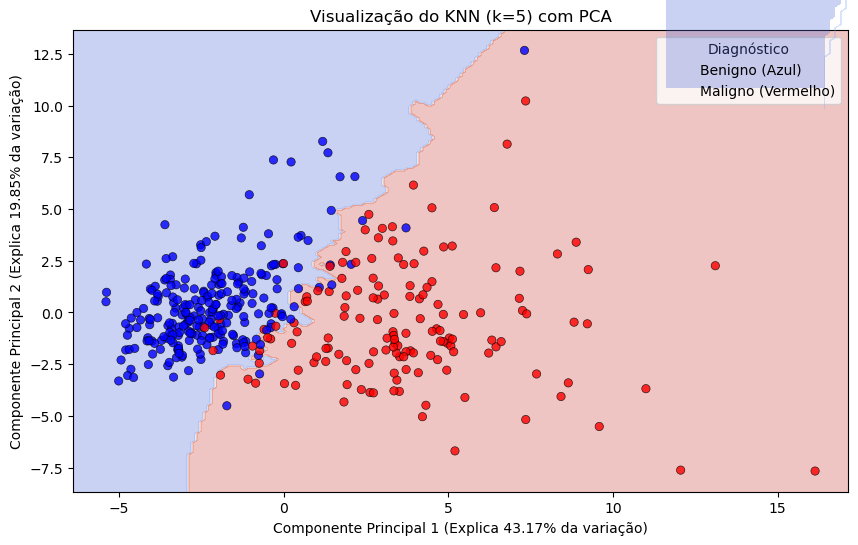

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def visualizar_knn(df, k=5, test_size=0.3, random_state=42):
  
    X = df.drop(columns=['diagnóstico'])
    y = df['diagnóstico']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Padronizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reduzir para 2 dimensões com PCA
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    
    # Criar uma grade de pontos para visualização da decisão
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Fazer previsões para cada ponto da grade
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette={0: 'blue', 1: 'red'}, edgecolor='k', alpha=0.8)
    plt.title(f'Visualização do KNN (k={k}) com PCA')
    plt.xlabel(f'Componente Principal 1 (Explica {pca.explained_variance_ratio_[0]*100:.2f}% da variação)')
    plt.ylabel(f'Componente Principal 2 (Explica {pca.explained_variance_ratio_[1]*100:.2f}% da variação)')
    plt.legend(title='Diagnóstico', labels=['Benigno (Azul)', 'Maligno (Vermelho)'])
    plt.show()

visualizar_knn(df, k=5)


In [35]:
# SVM
# COM PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(kernel='linear') 
svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo SVM: 0.94

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [36]:
# SVM
# SEM PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo SVM: {accuracy:.2f}')

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))


Acurácia do modelo SVM: 0.97

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



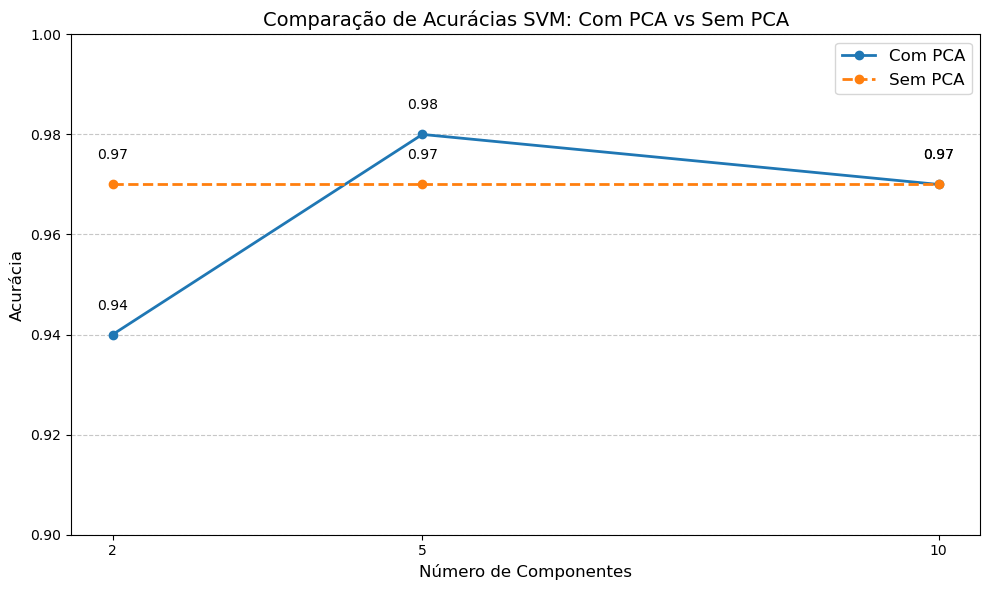

In [37]:


components = [2, 5, 10]  
accuracy_with_pca = [0.94, 0.98, 0.97]  # Acurácias com PCA
accuracy_without_pca = [0.97, 0.97, 0.97]  # Acurácias sem PCA

plt.figure(figsize=(10, 6))
plt.plot(components, accuracy_with_pca, marker='o', label='Com PCA', linestyle='-', linewidth=2)
plt.plot(components, accuracy_without_pca, marker='o', label='Sem PCA', linestyle='--', linewidth=2)

plt.title('Comparação de Acurácias SVM: Com PCA vs Sem PCA', fontsize=14)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.ylim(0.9, 1)  
plt.xticks(components)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

for x, y in zip(components, accuracy_with_pca):
    plt.text(x, y + 0.005, f'{y:.2f}', ha='center', fontsize=10)
for x, y in zip(components, accuracy_without_pca):
    plt.text(x, y + 0.005, f'{y:.2f}', ha='center', fontsize=10)


plt.tight_layout()
plt.show()


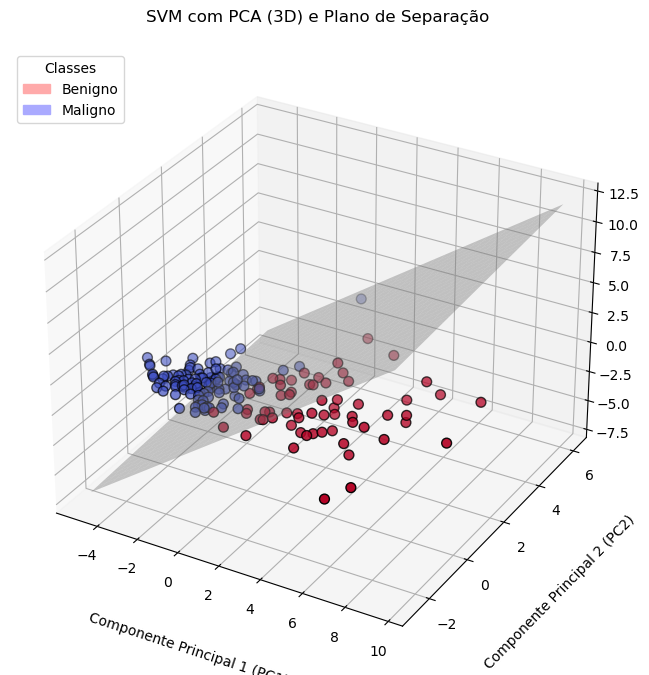

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.svm import SVC

def plot_svm_3d_with_legend(X, y, model):
    """
    Plota o SVM em 3D com o plano de separação e uma legenda ajustada.
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotar os pontos de dados
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)

    # Obter os coeficientes do hiperplano
    w = model.coef_[0]
    b = model.intercept_[0]

    # Criar uma grade para o plano de separação
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = np.linspace(x_min, x_max, 30)
    y_range = np.linspace(y_min, y_max, 30)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)

    # Equação do plano
    Z_grid = -(w[0] * X_grid + w[1] * Y_grid + b) / w[2]

    # Plotar o plano de separação
    ax.plot_surface(X_grid, Y_grid, Z_grid, color='gray', alpha=0.4)

    ax.set_xlabel('Componente Principal 1 (PC1)', labelpad=20)
    ax.set_ylabel('Componente Principal 2 (PC2)', labelpad=20)
    ax.set_zlabel('Componente Principal 3 (PC3)', labelpad=20)
    ax.set_title('SVM com PCA (3D) e Plano de Separação', pad=20)

    legenda_benigno = mpatches.Patch(color='#FFAAAA', label='Benigno')
    legenda_maligno = mpatches.Patch(color='#AAAAFF', label='Maligno')
    ax.legend(handles=[legenda_benigno, legenda_maligno], loc='upper left', title='Classes', fontsize=10)

    plt.show()


svm_3d = SVC(kernel='linear')
svm_3d.fit(X_train_pca, y_train)

plot_svm_3d_with_legend(X_test_pca, y_test, svm_3d)
